***DSCI 100 Project proposal***

Natsumi Tadakuma, Jackie Huang, Cindy Chen, Nikko Dumrique

Importing the libraries:

In [3]:
library(tidyverse)
library(tidyr)
library(repr)
library(tidymodels)
library(ggplot2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [4]:
options(repr.matrix.max.rows = 5, repr.matrix.max.cols = 64)
options(repr.plot.width = 30, repr.plot.height = 10)

Importing the dataset:

In [5]:
#download the zip file into a temporary file
temp <- tempfile()
temp_dir <- tempfile()
download.file("https://archive.ics.uci.edu/ml/machine-learning-databases/00332/OnlineNewsPopularity.zip", temp, mode="wb")
OnlineNewsPopularity_unzipped <- unzip(temp, exdir = temp_dir)

#read the csv within the unzipped_contents
online_news_pop_csv <- OnlineNewsPopularity_unzipped[2] #may be unzipped_contents[1] if you get an error
online_news_pop_data <- read_csv(online_news_pop_csv)
online_news_pop_data
unlink(c(temp, temp_dir))

Parsed with column specification:
cols(
  .default = col_double(),
  url = col_character()
)

See spec(...) for full column specifications.



url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
http://mashable.com/2013/01/07/amazon-instant-video-browser/,731,12,219,0.6635945,1,0.8153846,4,2,1,0,4.680365,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,496,496,496,1,0,0,0,0,0,0,0,0.5003312,0.37827893,0.04000468,0.04126265,0.04012254,0.5216171,0.09256198,0.04566210,0.013698630,0.7692308,0.2307692,0.3786364,0.10000000,0.7,-0.3500000,-0.600,-0.2000000,0.5,-0.1875,0.0,0.1875,593
http://mashable.com/2013/01/07/ap-samsung-sponsored-tweets/,731,9,255,0.6047431,1,0.7919463,3,1,1,0,4.913725,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.7997557,0.05004668,0.05009625,0.05010067,0.05000071,0.3412458,0.14894781,0.04313725,0.015686275,0.7333333,0.2666667,0.2869146,0.03333333,0.7,-0.1187500,-0.125,-0.1000000,0.0,0.0000,0.5,0.0000,711
http://mashable.com/2013/01/07/apple-40-billion-app-downloads/,731,9,211,0.5751295,1,0.6638655,3,1,1,0,4.393365,6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,918,918,918,1,0,0,0,0,0,0,0,0.2177923,0.03333446,0.03335142,0.03333354,0.68218829,0.7022222,0.32333333,0.05687204,0.009478673,0.8571429,0.1428571,0.4958333,0.10000000,1.0,-0.4666667,-0.800,-0.1333333,0.0,0.0000,0.5,0.0000,1500
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
http://mashable.com/2014/12/27/ukraine-blasts/,8,6,682,0.5394933,1,0.6926605,10,1,1,0,4.975073,5,0,0,0,0,0,1,-1,0,-1.0,0,843300,254600,0.000,3384.317,1777.896,452,452,452,0,0,1,0,0,0,0,0,0.04000361,0.04000349,0.83998726,0.04000210,0.04000355,0.3585776,-0.008065863,0.02052786,0.02346041,0.4666667,0.5333333,0.2368506,0.0625,0.5,-0.2052455,-0.5,-0.0125,0.0000000,0.00,0.5000000,0.00,1100
http://mashable.com/2014/12/27/youtube-channels-2015/,8,10,157,0.7019868,1,0.8461538,1,1,0,2,4.471338,4,0,1,0,0,0,0,-1,97,23.5,205600,843300,366200,3035.081,3613.513,3296.909,2100,2100,2100,0,0,1,0,0,0,0,0,0.05000126,0.79933895,0.05000041,0.05065874,0.05000064,0.5178932,0.104891775,0.06369427,0.01273885,0.8333333,0.1666667,0.2473377,0.1000,0.5,-0.2000000,-0.2,-0.2000,0.3333333,0.25,0.1666667,0.25,1300


summary on the number of shares:

In [6]:
summary(online_news_pop_data$shares)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1     946    1400    3395    2800  843300 

tidying the data:

In [7]:
news = online_news_pop_data %>% 
      mutate(popularity = ifelse(shares < 500, "Not_Popular",
                          ifelse(shares %in% 500:1399, "Somewhat_Popular",
                          ifelse(shares %in% 1400:3299, "Popular", "Viral")))) %>% 
      mutate(popularity = as_factor(popularity))

In [8]:
# combining the weekdays and data channels into one column
# which(colnames(news)=="data_channel_is_lifestyle")

news[,14:19][news[,14:19] == 0] = NA

news = news %>% 
    pivot_longer(data_channel_is_lifestyle:data_channel_is_world,
                 names_to = "Channel",
                 names_prefix = "data_channel_is_",
                 values_to = "Value",
                 values_drop_na = TRUE) %>% 
  select(-Value)

# which(colnames(news)=="weekday_is_monday")
news[,32:38][news[32:38] == 0] = NA
news = news %>% 
    pivot_longer(weekday_is_monday:weekday_is_sunday,
                 names_to = "weekday",
                 names_prefix = "weekday_is_",
                 values_to = "value",
                 values_drop_na = TRUE) %>% 
  select(-value)
news

url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,popularity,Channel,weekday
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>,<chr>
http://mashable.com/2013/01/07/amazon-instant-video-browser/,731,12,219,0.6635945,1,0.8153846,4,2,1,0,4.680365,5,0,0,0,0,0,0,0,0,0,496,496,496,NA,0.5003312,0.3782789,0.04000468,0.04126265,0.04012254,0.5216171,0.09256198,0.0456621,0.01369863,0.7692308,0.2307692,0.3786364,0.1,0.7,-0.35,-0.6,-0.2,0.5,-0.1875,0,0.1875,593,Somewhat_Popular,entertainment,monday
http://mashable.com/2013/01/07/amazon-instant-video-browser/,731,12,219,0.6635945,1,0.8153846,4,2,1,0,4.680365,5,0,0,0,0,0,0,0,0,0,496,496,496,NA,0.5003312,0.3782789,0.04000468,0.04126265,0.04012254,0.5216171,0.09256198,0.0456621,0.01369863,0.7692308,0.2307692,0.3786364,0.1,0.7,-0.35,-0.6,-0.2,0.5,-0.1875,0,0.1875,593,Somewhat_Popular,entertainment,tuesday
http://mashable.com/2013/01/07/amazon-instant-video-browser/,731,12,219,0.6635945,1,0.8153846,4,2,1,0,4.680365,5,0,0,0,0,0,0,0,0,0,496,496,496,NA,0.5003312,0.3782789,0.04000468,0.04126265,0.04012254,0.5216171,0.09256198,0.0456621,0.01369863,0.7692308,0.2307692,0.3786364,0.1,0.7,-0.35,-0.6,-0.2,0.5,-0.1875,0,0.1875,593,Somewhat_Popular,entertainment,wednesday
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
http://mashable.com/2014/12/27/youtube-channels-2015/,8,10,157,0.7019868,1,0.8461538,1,1,0,2,4.471338,4,-1,97,23.5,205600,843300,366200,3035.081,3613.513,3296.909,2100,2100,2100,NA,0.05000126,0.799339,0.05000041,0.05065874,0.05000064,0.5178932,0.1048918,0.06369427,0.01273885,0.8333333,0.1666667,0.2473377,0.1,0.5,-0.2,-0.2,-0.2,0.3333333,0.25,0.1666667,0.25,1300,Somewhat_Popular,entertainment,friday
http://mashable.com/2014/12/27/youtube-channels-2015/,8,10,157,0.7019868,1,0.8461538,1,1,0,2,4.471338,4,-1,97,23.5,205600,843300,366200,3035.081,3613.513,3296.909,2100,2100,2100,NA,0.05000126,0.799339,0.05000041,0.05065874,0.05000064,0.5178932,0.1048918,0.06369427,0.01273885,0.8333333,0.1666667,0.2473377,0.1,0.5,-0.2,-0.2,-0.2,0.3333333,0.25,0.1666667,0.25,1300,Somewhat_Popular,entertainment,saturday


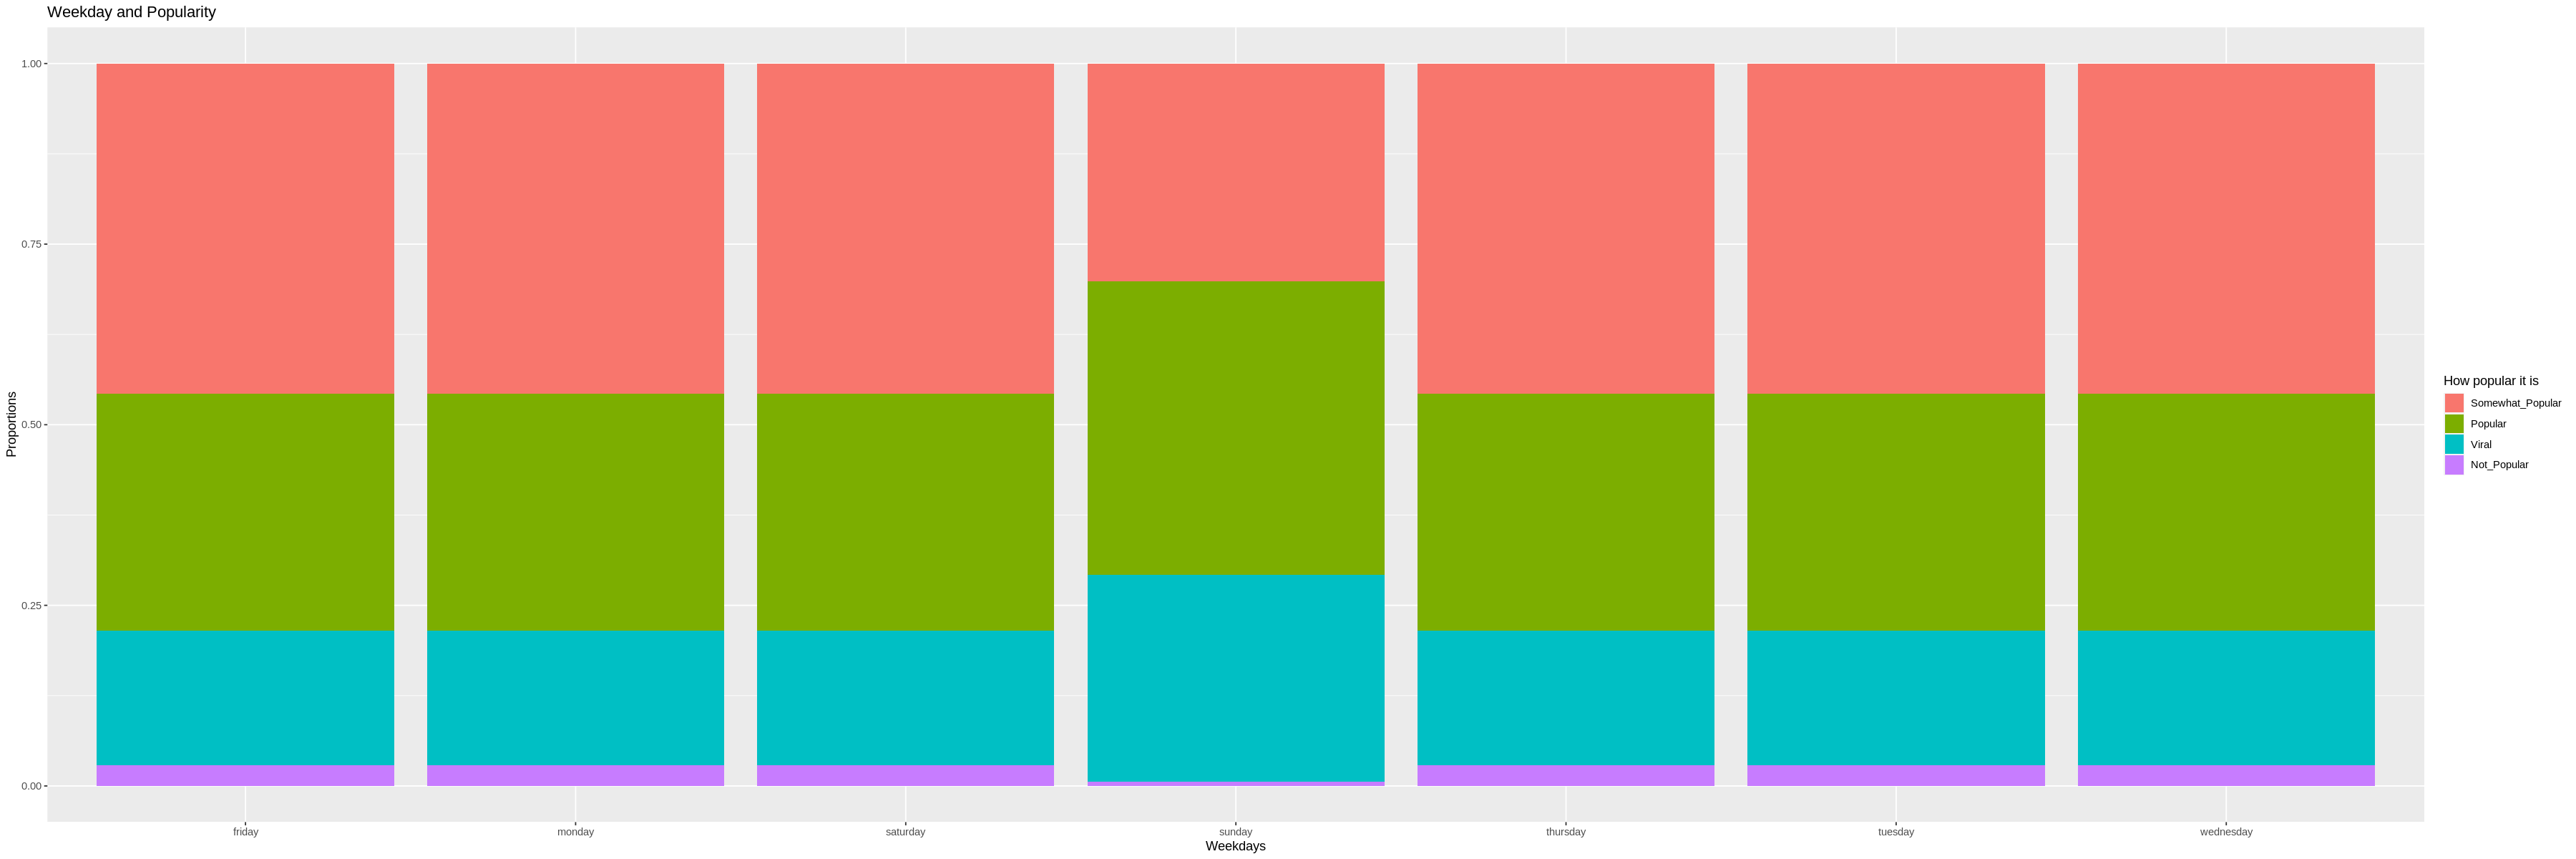

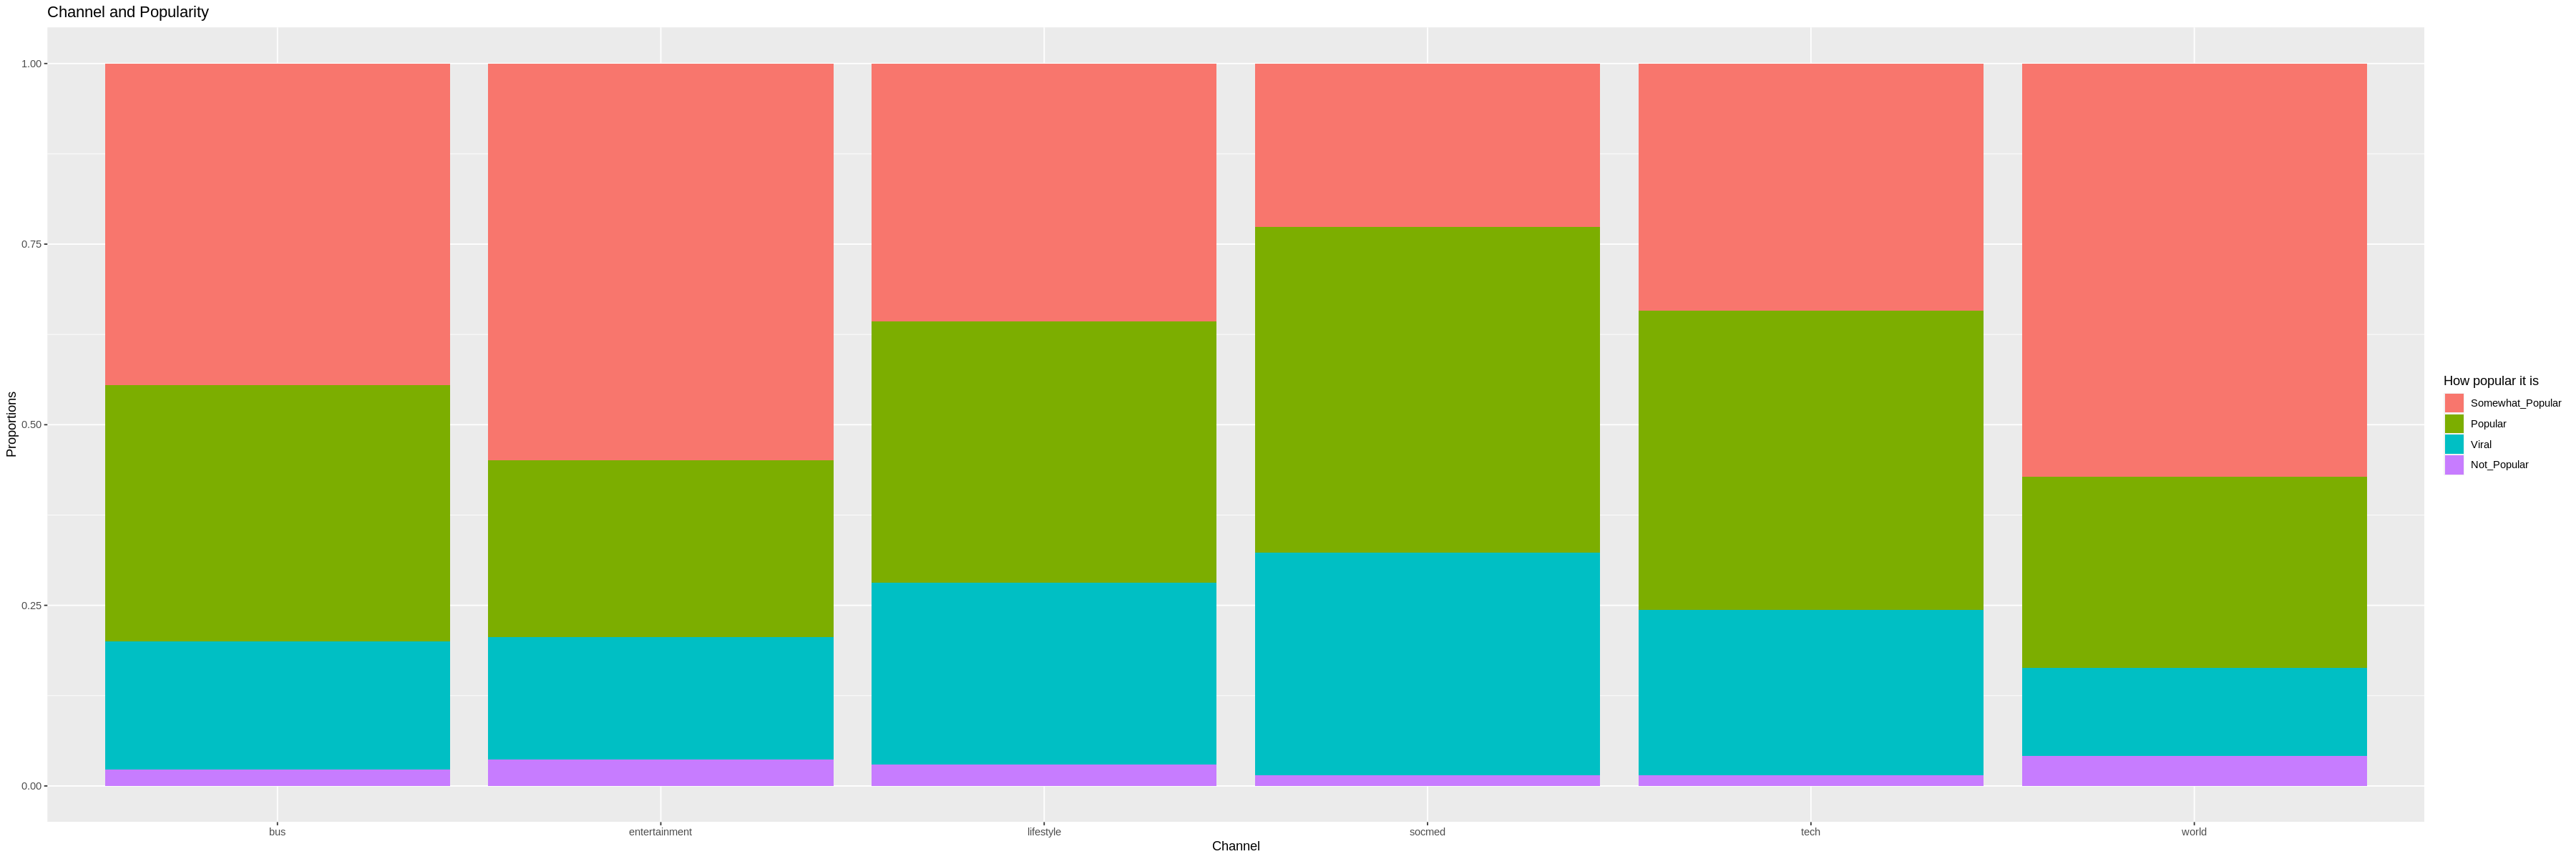

In [9]:
#plots
pltWeekdays = news %>% 
            ggplot(aes(x = weekday, fill = popularity)) +
            geom_bar(position = "fill") + 
            labs( x = "Weekdays", y = "Proportions", fill = "How popular it is", 
                  title = "Weekday and Popularity")
pltWeekdays

pltChannels = news %>% 
            ggplot(aes(x = Channel, fill = popularity)) +
            geom_bar(position = "fill") + 
            labs( x = "Channel", y = "Proportions", fill = "How popular it is", 
                  title = "Channel and Popularity")
pltChannels


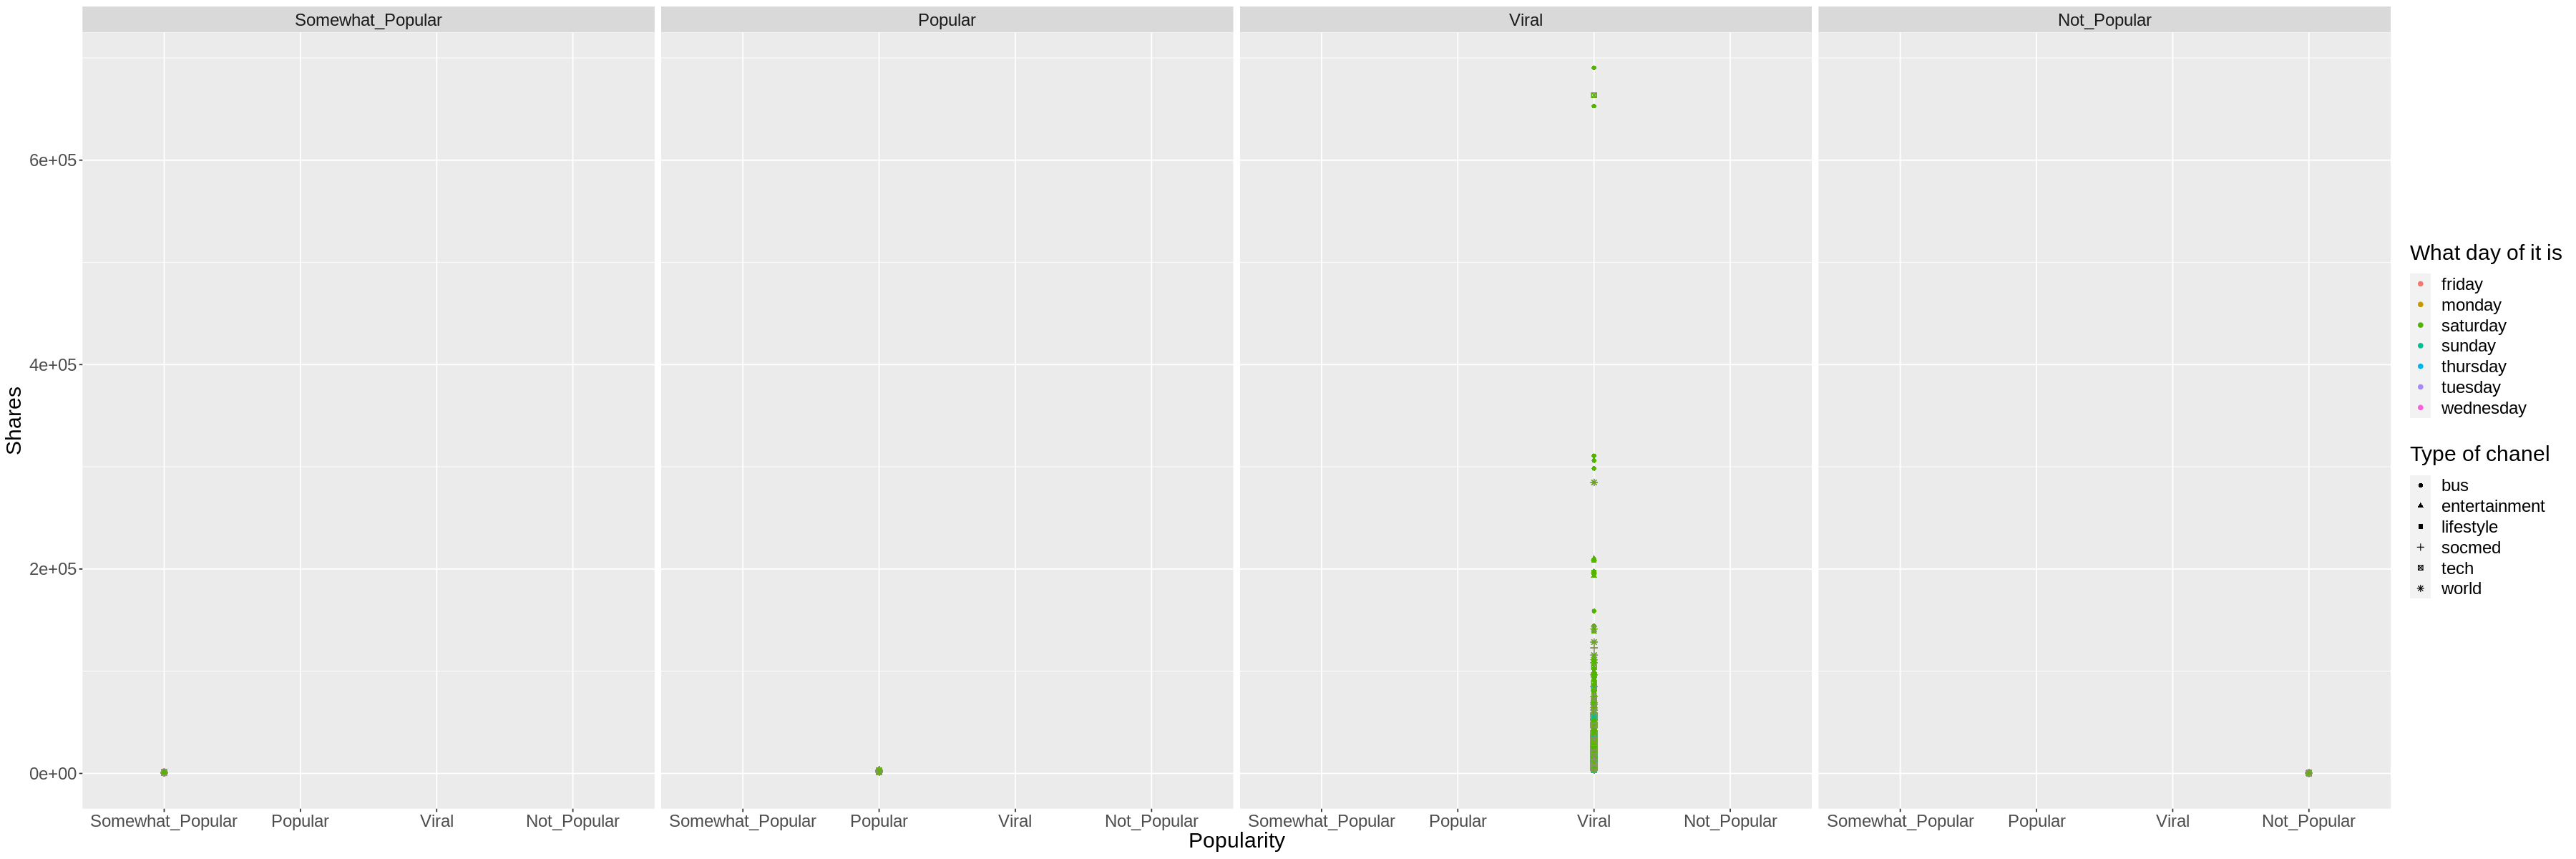

In [10]:

pltWkCh = news %>% 
#         filter(shares < 500) %>% 
        ggplot(aes(x = factor(popularity), y = shares)) +
        facet_grid(. ~popularity, scales = "free_y", space = "free_y") +
        geom_point(aes(color = weekday, shape = Channel), size = 1.5) +
        labs(x = "Popularity", y = "Shares", color = "What day of it is",
             shape = "Type of chanel") +
  theme(text = element_text(size = 18))
pltWkCh

# pltWkCh2 = news %>%
#         filter(shares < 3300) %>% 
#         ggplot(aes(x = popularity, y = shares)) +
#         geom_point(aes(color = weekday, shape = Channel), size = 1.5) +
#         labs(x = "Popularity", y = "Shares", color = "What day of it is",
#              shape = "Type of chanel")
# pltWkCh2

seperating our training set:

In [16]:
splitted_data <- initial_split(news, prop = 0.75, strata = popularity)  
training_set <- training(splitted_data)   
testing_set <- testing(splitted_data)
training_set
testing_set

url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,popularity,Channel,weekday
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>,<chr>
http://mashable.com/2013/01/07/amazon-instant-video-browser/,731,12,219,0.6635945,1,0.8153846,4,2,1,0,4.680365,5,0,0,0,0,0,0,0,0,0,496,496,496,NA,0.5003312,0.3782789,0.04000468,0.04126265,0.04012254,0.5216171,0.09256198,0.0456621,0.01369863,0.7692308,0.2307692,0.3786364,0.1,0.7,-0.35,-0.6,-0.2,0.5,-0.1875,0,0.1875,593,Somewhat_Popular,entertainment,tuesday
http://mashable.com/2013/01/07/amazon-instant-video-browser/,731,12,219,0.6635945,1,0.8153846,4,2,1,0,4.680365,5,0,0,0,0,0,0,0,0,0,496,496,496,NA,0.5003312,0.3782789,0.04000468,0.04126265,0.04012254,0.5216171,0.09256198,0.0456621,0.01369863,0.7692308,0.2307692,0.3786364,0.1,0.7,-0.35,-0.6,-0.2,0.5,-0.1875,0,0.1875,593,Somewhat_Popular,entertainment,wednesday
http://mashable.com/2013/01/07/amazon-instant-video-browser/,731,12,219,0.6635945,1,0.8153846,4,2,1,0,4.680365,5,0,0,0,0,0,0,0,0,0,496,496,496,NA,0.5003312,0.3782789,0.04000468,0.04126265,0.04012254,0.5216171,0.09256198,0.0456621,0.01369863,0.7692308,0.2307692,0.3786364,0.1,0.7,-0.35,-0.6,-0.2,0.5,-0.1875,0,0.1875,593,Somewhat_Popular,entertainment,thursday
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
http://mashable.com/2014/12/27/youtube-channels-2015/,8,10,157,0.7019868,1,0.8461538,1,1,0,2,4.471338,4,-1,97,23.5,205600,843300,366200,3035.081,3613.513,3296.909,2100,2100,2100,NA,0.05000126,0.799339,0.05000041,0.05065874,0.05000064,0.5178932,0.1048918,0.06369427,0.01273885,0.8333333,0.1666667,0.2473377,0.1,0.5,-0.2,-0.2,-0.2,0.3333333,0.25,0.1666667,0.25,1300,Somewhat_Popular,entertainment,wednesday
http://mashable.com/2014/12/27/youtube-channels-2015/,8,10,157,0.7019868,1,0.8461538,1,1,0,2,4.471338,4,-1,97,23.5,205600,843300,366200,3035.081,3613.513,3296.909,2100,2100,2100,NA,0.05000126,0.799339,0.05000041,0.05065874,0.05000064,0.5178932,0.1048918,0.06369427,0.01273885,0.8333333,0.1666667,0.2473377,0.1,0.5,-0.2,-0.2,-0.2,0.3333333,0.25,0.1666667,0.25,1300,Somewhat_Popular,entertainment,thursday


url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,popularity,Channel,weekday
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>,<chr>
http://mashable.com/2013/01/07/amazon-instant-video-browser/,731,12,219,0.6635945,1,0.8153846,4,2,1,0,4.680365,5,0,0,0,0,0,0,0,0,0,496,496,496,NA,0.5003312,0.37827893,0.04000468,0.04126265,0.04012254,0.5216171,0.09256198,0.04566210,0.01369863,0.7692308,0.2307692,0.3786364,0.10000000,0.7,-0.35000,-0.600,-0.2,0.5,-0.1875,0.0,0.1875,593,Somewhat_Popular,entertainment,monday
http://mashable.com/2013/01/07/ap-samsung-sponsored-tweets/,731,9,255,0.6047431,1,0.7919463,3,1,1,0,4.913725,4,0,0,0,0,0,0,0,0,0,0,0,0,NA,0.7997557,0.05004668,0.05009625,0.05010067,0.05000071,0.3412458,0.14894781,0.04313725,0.01568627,0.7333333,0.2666667,0.2869146,0.03333333,0.7,-0.11875,-0.125,-0.1,0.0,0.0000,0.5,0.0000,711,Somewhat_Popular,bus,monday
http://mashable.com/2013/01/07/ap-samsung-sponsored-tweets/,731,9,255,0.6047431,1,0.7919463,3,1,1,0,4.913725,4,0,0,0,0,0,0,0,0,0,0,0,0,NA,0.7997557,0.05004668,0.05009625,0.05010067,0.05000071,0.3412458,0.14894781,0.04313725,0.01568627,0.7333333,0.2666667,0.2869146,0.03333333,0.7,-0.11875,-0.125,-0.1,0.0,0.0000,0.5,0.0000,711,Somewhat_Popular,bus,tuesday
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
http://mashable.com/2014/12/27/youtube-channels-2015/,8,10,157,0.7019868,1,0.8461538,1,1,0,2,4.471338,4,-1,97,23.5,205600,843300,366200,3035.081,3613.513,3296.909,2100,2100,2100,NA,0.05000126,0.799339,0.05000041,0.05065874,0.05000064,0.5178932,0.1048918,0.06369427,0.01273885,0.8333333,0.1666667,0.2473377,0.1,0.5,-0.2,-0.2,-0.2,0.3333333,0.25,0.1666667,0.25,1300,Somewhat_Popular,entertainment,friday
http://mashable.com/2014/12/27/youtube-channels-2015/,8,10,157,0.7019868,1,0.8461538,1,1,0,2,4.471338,4,-1,97,23.5,205600,843300,366200,3035.081,3613.513,3296.909,2100,2100,2100,NA,0.05000126,0.799339,0.05000041,0.05065874,0.05000064,0.5178932,0.1048918,0.06369427,0.01273885,0.8333333,0.1666667,0.2473377,0.1,0.5,-0.2,-0.2,-0.2,0.3333333,0.25,0.1666667,0.25,1300,Somewhat_Popular,entertainment,saturday


In [17]:
training_report <- news %>% 
    select(n_unique_tokens, average_token_length, kw_avg_min, kw_avg_max,)
training_report

n_unique_tokens,average_token_length,kw_avg_min,kw_avg_max
<dbl>,<dbl>,<dbl>,<dbl>
0.6635945,4.680365,0,0
0.6635945,4.680365,0,0
0.6635945,4.680365,0,0
⋮,⋮,⋮,⋮
0.7019868,4.471338,23.5,366200
0.7019868,4.471338,23.5,366200


In [43]:
report <- tibble(n_unique_tokens = length(training_report$n_unique_tokens[training_report$n_unique_tokens == 0]),
            average_token_length = length(training_report$average_token_length[training_report$n_unique_tokens == 0]),
            kw_avg_min = length(training_report$kw_avg_min[training_report$kw_avg_min == 0]),
            kw_avg_max = length(training_report$kw_avg_max[training_report$kw_avg_max ==0])) %>% 
    add_row(n_unique_tokens = 203249 - max(report[1,]),
            average_token_length = 203249 - max(report[1,]),
            kw_avg_min = 203249 - max(report[1,]),
            kw_avg_max = 203249 - max(report[1,])) 

#setting all the zeros to NA
training_report[,1:4][training_report[,1:4] == 0] = NA

report <- report %>% 
    add_row(n_unique_tokens = mean(training_report$n_unique_tokens, na.rm = TRUE),
            average_token_length = mean(training_report$average_token_length, na.rm = TRUE),
           kw_avg_min = mean(training_report$kw_avg_min, na.rm = TRUE),
           kw_avg_max = mean(training_report$kw_avg_max, na.rm = TRUE))

row.names(report) = c("missing_value", "number_of_observations", "the_means_of_each_predictors")
report

Warning message:
“Setting row names on a tibble is deprecated.”


,n_unique_tokens,average_token_length,kw_avg_min,kw_avg_max
,<dbl>,<dbl>,<dbl>,<dbl>
missing_value,3.280000e+03,3.280000e+03,451.0000,438
number_of_observations,1.999690e+05,1.999690e+05,199969.0000,199969
the_means_of_each_predictors,5.582743e-01,4.683252e+00,309.7929,242209
